In [1]:
import sys
from sklearn.preprocessing import MinMaxScaler
sys.path.append("./../src/")

# Modules of src folder
import data_loader as dl
import run
import visualizations

## Prepare models

In [2]:
kwf2 = dl.load_kelmarsh_data(from_raw=False)

In [3]:
# See run.py for meaning of these parameters
uk = True
shifts = [1,6,144]
non_nan_percentage = 90
col_to_be_lagged = ["Wind speed (m/s)",'Long Term Wind (m/s)', 
                   'Density adjusted wind speed (m/s)',
                   'Wind direction (°)',"power"]
val_ratio=0.2
scalers = [MinMaxScaler(),MinMaxScaler(),MinMaxScaler()]
model_name = "xgboost"

## Run models

In [4]:
models = run.pipeline(kwf2, model_name, uk, shifts, non_nan_percentage, 
                      col_to_be_lagged, val_ratio, scalers)

/Users/timw/Documents/University/renewable-energy-wind/doc/./../src/model.py:88: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  predictions = np.array([0 if pred < 0 else 2000 if pred > 2000 else pred for pred in predictions])


Finished training model 10min horizon


/Users/timw/Documents/University/renewable-energy-wind/doc/./../src/model.py:88: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  predictions = np.array([0 if pred < 0 else 2000 if pred > 2000 else pred for pred in predictions])


Finished training model 1 hour horizon
Finished training model 1 day horizon


/Users/timw/Documents/University/renewable-energy-wind/doc/./../src/model.py:88: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  predictions = np.array([0 if pred < 0 else 2000 if pred > 2000 else pred for pred in predictions])


## Plot results

In [5]:
visualizations.plot_metrics("Kelmarsh",models)

| Model Name              |    RMSE |   Benchmark_RMSE |     MAE |   Benchmark_MAE |
|:------------------------|--------:|-----------------:|--------:|----------------:|
| Kelmarsh 10min horizon  | 199.268 |          145.603 | 109.306 |         91.5538 |
| Kelmarsh 1 hour horizon | 252.529 |          263.749 | 173.912 |        183.286  |
| Kelmarsh 1 day horizon  | 623.283 |          623.023 | 502.207 |        510.71   |


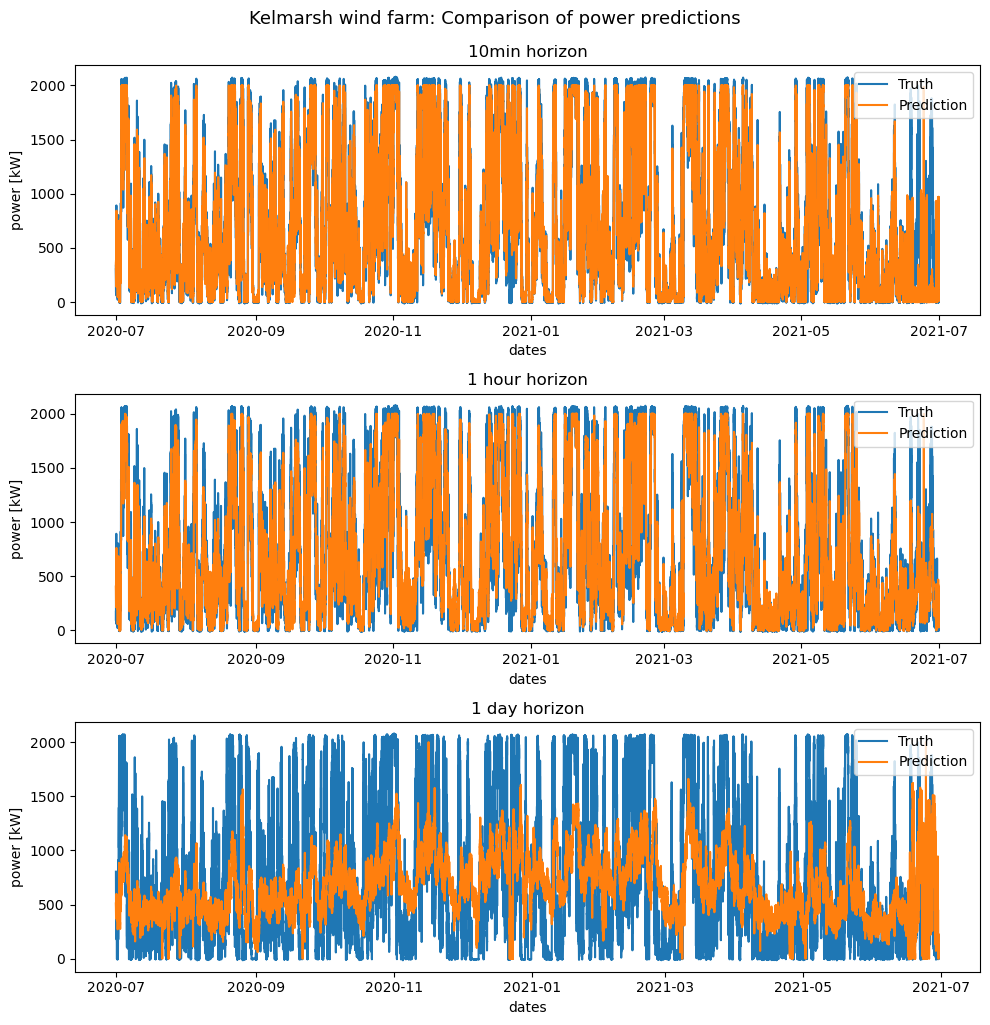

In [6]:
visualizations.plot_models("Kelmarsh",models)
